<a href="https://colab.research.google.com/github/priii-25/Linear-Regression-Model/blob/main/LinearRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
class linearReg():
  def __init__(self,learning_rate,epochs):
    #initialting hyperparamters
    self.learning_rate=learning_rate
    self.epochs=epochs

  def fit(self,x,y):
    #initializing weights and bias
    self.m,self.n=x.shape
    self.w=np.zeros(self.n)
    self.b=0
    self.x=x
    self.y=y
    #implementing gradient descent
    for i in range(self.epochs):
      self.update_weight()

  def update_weight(self):
    y_prediction=self.predict(self.x)
    #calculating gradients
    dw=-(2*(self.x.T).dot(self.y-y_prediction))/self.m
    db=-(2*np.sum(self.y-y_prediction))/self.m
    #updating weights
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db

  def predict(self,x):
    return x.dot(self.w)+self.b

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
salary_d=pd.read_csv('/content/salary_data.csv')
salary_d.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
x=salary_d.iloc[:,:-1]
y=salary_d.iloc[:,1].values
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.33,random_state=2)

In [ ]:
model=linearReg(learning_rate=0.02,epochs=1000)

In [ ]:
model.fit(x_train, y_train)
print("weight",model.w[0])
print("bias",model.b)

weight 9514.400999035135
bias 23697.406507136307


In [ ]:
testd_p=model.predict(x_test)
print(testd_p)

1      36066.127806
0      34163.247606
14     66512.211003
9      58900.690204
21     91249.653600
19     80783.812501
23    101715.494699
6      52240.609504
3      42726.208505
20     88395.333301
dtype: float64


Text(0, 0.5, 'Salary')

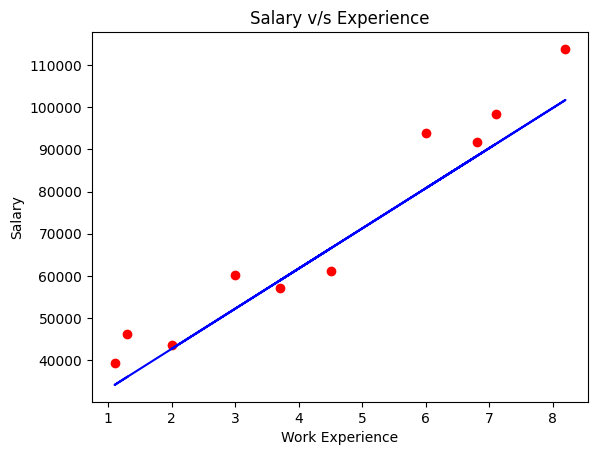

In [ ]:
plt.scatter(x_test,y_test,color="red")
plt.plot(x_test, testd_p, color="blue")
plt.title("Salary v/s Experience")
plt.xlabel("Work Experience")
plt.ylabel("Salary")